In [1]:
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from first_model import first_model
from dynamic_model import dynamic_model
from first_round_rating import first_round_rating
from Elo_rating import Elo_rating
from generate_results import generate_results

import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
import math

In [2]:
n= 6
teams = list(range(1,n+1))
days = list(range(1,n))
each_p = []
each_sim = []
result_df = generate_results(teams)
solution_keeper = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
#random.seed(1)
big_obj_values2 = []
print(result_df)


    Team 1  Team 2 Result
0        1       2      1
1        1       3      3
2        1       4    tie
3        1       5      1
4        1       6    tie
5        2       3      2
6        2       4      4
7        2       5      2
8        2       6      2
9        3       4      3
10       3       5      3
11       3       6    tie
12       4       5    tie
13       4       6    tie
14       5       6    tie


In [3]:
excel_file_path = 'C:/Users/ug033207/solution2.xlsx'
with pd.ExcelWriter(excel_file_path) as writer: 
        p=2      
        k = math.ceil((n - 1) / p)
        rounds = [days[i*p:((i+1)*p)] for i in range(k)]
        rounds = list(filter(None, rounds))
        round1 = rounds[0]
        objective_values = []

        old_ratings = {1:40, 2:38, 3:35, 4:34, 5:29, 6:24}

        U_ij = np.zeros((n, n)) 
        ratings_array = np.array(list(old_ratings.values()))
        for i in range(n):
                for j in range(n):
                        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))

        ratings = old_ratings
        ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)

        solution_keeper = pd.DataFrame(columns=['Day', 'Team 1', 'Team 2'])
        solution_keeper.drop(solution_keeper.index, inplace=True)


        solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, round1)
        solution_keeper = pd.concat([solution_keeper, solution_df])
        ratings = {i: 0 for i in range(1, n+1)}
        U_ij = np.zeros((n, n)) 
        ratings_array = np.array(list(ratings.values()))
        for i in range(n):
                for j in range(n):
                        U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))
        ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)

        for i in round1:

                obj_count = 0
                for _, row in solution_df.iterrows():
                        team1 = row['Team 1']
                        team2 = row['Team 2']
                        day = row['Day']
                        if i == day:
                                obj_count += ratings_df.iloc[team1-1, team2-1]

                i= [i]
                ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, i)
                print(obj_count)
                objective_values.append(obj_count)
                a = random.randint(0,100)

                sheet_name = f'Solution_days{a}'.replace('[', '_').replace(']', '_')     
                solution_df.to_excel(writer, sheet_name=sheet_name)
                ratings_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')
        #ratings, ratings_df = first_round_rating(teams, solution_df, result_df)


        for r in rounds[1:]:
                solution_df, obj_value = dynamic_model(teams, days, ratings_df, solution_keeper, r)
                solution_keeper = pd.concat([solution_keeper, solution_df])
                for i in r:
                        obj_count = 0
                        for _, row in solution_df.iterrows():
                                team1 = row['Team 1']
                                team2 = row['Team 2']
                                day = row['Day']
                                if i == day:
                                        obj_count += ratings_df.iloc[team1-1, team2-1]
                        print(obj_count)

                        objective_values.append(obj_count)
                        i= [i]
                        a = random.randint(0,100)
                        ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, i)
                        sheet_name = f'Solution_days{a}'.replace('[', '_').replace(']', '_')     
                        solution_df.to_excel(writer, sheet_name=sheet_name)
                        ratings_df.to_excel(writer, sheet_name=sheet_name + '_Ratings')
                
        print(objective_values)

PermissionError: [Errno 13] Permission denied: 'C:/Users/ug033207/solution2.xlsx'

In [ ]:
print(each_p)
each_p_array = np.array(each_p)
each_p_array = np.reshape(each_p_array,(99,7))
#print(each_p_array)
mean = np.mean(each_p_array, axis =0)
print(mean)

[54.0, 56.0, 56.0, 67.0, 60.0, 75.0, 60.0, 38.0, 59.0, 56.0, 58.0, 56.0, 74.0, 59.0, 44.0, 50.0, 69.0, 75.0, 46.0, 67.0, 73.0, 87.0, 62.0, 44.0, 74.0, 62.0, 87.0, 56.0, 40.0, 49.0, 72.0, 63.0, 46.0, 79.0, 74.0, 54.0, 48.0, 60.0, 40.0, 69.0, 55.0, 53.0, 56.0, 66.0, 77.0, 59.0, 58.0, 62.0, 48.0, 77.0, 66.0, 67.0, 59.0, 63.0, 82.0, 69.0, 55.0, 54.0, 52.0, 44.0, 48.0, 65.0, 51.0, 58.0, 59.0, 55.0, 73.0, 68.0, 58.0, 27.0, 45.0, 49.0, 70.0, 52.0, 41.0, 48.0, 48.0, 49.0, 57.0, 74.0, 49.0, 45.0, 55.0, 57.0, 46.0, 48.0, 37.0, 41.0, 70.0, 65.0, 77.0, 72.0, 54.0, 53.0, 42.0, 81.0, 92.0, 52.0, 59.0, 43.0, 75.0, 50.0, 66.0, 51.0, 64.0, 50.0, 70.0, 60.0, 73.0, 74.0, 47.0, 48.0, 50.0, 72.0, 82.0, 35.0, 49.0, 83.0, 64.0, 53.0, 60.0, 57.0, 65.0, 50.0, 73.0, 51.0, 56.0, 76.0, 61.0, 60.0, 50.0, 61.0, 46.0, 40.0, 42.0, 71.0, 71.0, 77.0, 68.0, 57.0, 47.0, 62.0, 67.0, 50.0, 66.0, 55.0, 64.0, 70.0, 62.0, 62.0, 68.0, 59.0, 81.0, 53.0, 37.0, 76.0, 52.0, 48.0, 61.0, 66.0, 72.0, 40.0, 38.0, 59.0, 48.0, 52.0, 57.

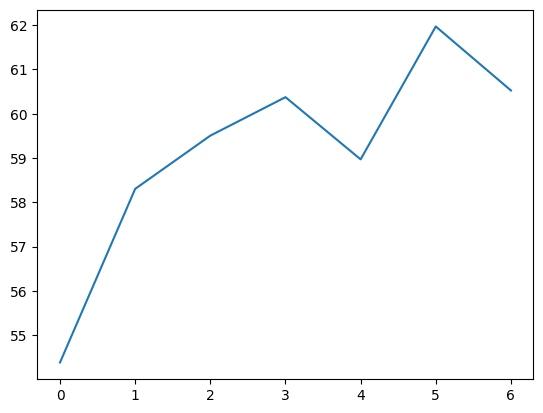

In [2]:
#50 simülasyon maç sonuçları sabit, başlangıc puanları (0,100) arası random sayı.
a =[27.26530612, 27.57142857, 28.93877551, 27.12244898, 28.08163265]
#100 simülasyon maç sonuçları sabit, başlangıc puanları (0,100) arası random sayı.
b = [20.93939394, 23.61616162, 21.5959596,  23.42424242, 23.11111111]
#500 simülasyon maç sonuçları sabit, başlangıc puanları (0,100) arası random sayı.
c = [21.81763527, 26.80761523, 24.26052104, 23.37074148, 39.48496994]
#100 simülasyon her seferinde farklı maç sonuçları takımların puanları şu şekilde: old_ratings = {1:0, 2:0, 3:0, 4:10, 5:10, 6:10}
d = [24.56565657, 25.2020202,  26.08080808, 25.76767677, 25.90909091]
#100 simülasyon her seferinde farklı maç sonuçları takımların puanları şu şekilde: old_ratings = old_ratings = {1:0, 2:0, 3:10, 4:10, 5:20, 6:20}
e = [22.66666667, 24.36363636, 25.51515152, 25.27272727, 25.70707071]
#100 simülasyon her seferinde farklı maç sonuçları takımların puanları şu şekilde: old_ratings = {1:2, 2:5, 3:8, 4:12, 5:13, 6:17}
f = [23.87878788, 25.1010101,  25.12121212, 25.43434343, 25.88888889]
#100 simülasyon her seferinde farklı maç sonuçları takımların puanları (0,100) arası random sayılar.
g = [23.03030303, 25.50505051, 25.71717172, 25.94949495, 25.92929293]
#100 simülasyon her seferinde farklı maç sonuçları takımların puanları (0,10) arası random sayılar.
h= [24.35353535, 25.86868687, 25.19191919, 24.91919192, 25.36363636]
#100 simülasyon her seferinde farklı maç sonuçları takımların puanları 0 arası random sayılar.
k = [23.80761523, 24.66332665, 25.38677355, 25.39478958, 25.74749499]
#random maç sonuçları başlangıç hepsi sıfır 8 takımlı
l = [54.38383838, 58.3030303,  59.50505051, 60.37373737, 58.96969697, 61.96969697, 60.52525253]
#plt.plot(a)
#plt.plot(b)
#plt.plot(c)
#plt.plot(d)
#plt.plot(e)
#plt.plot(f)
plt.plot(l)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


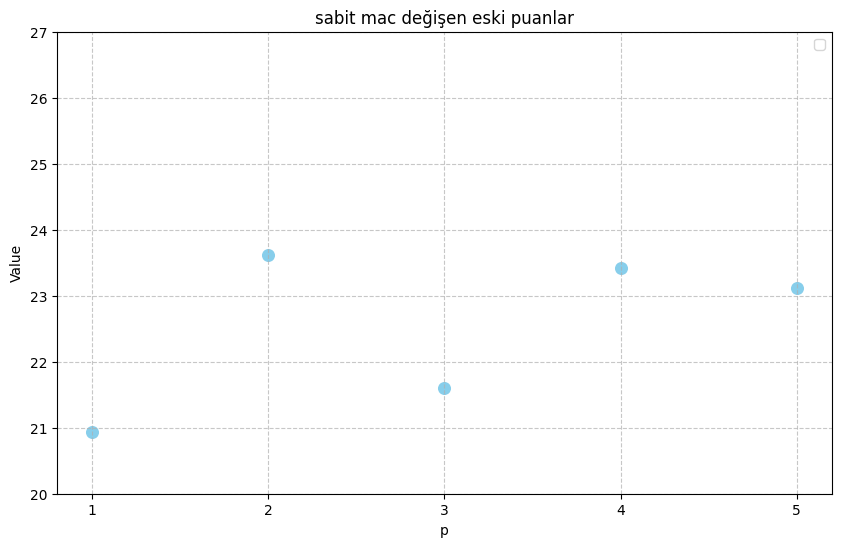

In [36]:
indices = range(1, 6)

plt.figure(figsize=(10, 6))
plt.scatter(indices, b, color='skyblue', s=70)
plt.title('sabit mac değişen eski puanlar')
plt.xlabel('p')
plt.ylabel('Value')
plt.xticks(indices)  # Set x-axis ticks to match indices
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a straight line at y = 45867 with red color
#plt.axhline(y=2650, color='red', linestyle='--', label='real schedule : 609')
#20 random scheduleın ortalaması
#plt.axhline(y=4039, color='green', linestyle='--', label='mean of 20 random schedules : 4039')
plt.ylim(20,27)
plt.legend()  # Show the legend including the added line
plt.show()
#3952, 3946, 4107